In [1]:
#LOad the required libraries
import numpy as np
import pandas as pd
import imblearn
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#import the dataset which is downloaded from the Kaggle
data = pd.read_csv('creditcard.csv')

In [3]:
#Lets have a look of data
data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [4]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Time,284807.0,9.481386e+04,47488.145955,0.000000,54201.500000,84692.000000,139320.500000,172792.000000
V1,284807.0,3.919560e-15,1.958696,-56.407510,-0.920373,0.018109,1.315642,2.454930
V2,284807.0,5.688174e-16,1.651309,-72.715728,-0.598550,0.065486,0.803724,22.057729
V3,284807.0,-8.769071e-15,1.516255,-48.325589,-0.890365,0.179846,1.027196,9.382558
V4,284807.0,2.782312e-15,1.415869,-5.683171,-0.848640,-0.019847,0.743341,16.875344
V5,284807.0,-1.552563e-15,1.380247,-113.743307,-0.691597,-0.054336,0.611926,34.801666
V6,284807.0,2.010663e-15,1.332271,-26.160506,-0.768296,-0.274187,0.398565,73.301626
V7,284807.0,-1.694249e-15,1.237094,-43.557242,-0.554076,0.040103,0.570436,120.589494
V8,284807.0,-1.927028e-16,1.194353,-73.216718,-0.208630,0.022358,0.327346,20.007208
V9,284807.0,-3.137024e-15,1.098632,-13.434066,-0.643098,-0.051429,0.597139,15.594995


From above description I came to know that there are no missing values and only one categorical data that is Class. Whether the fraudulant case happened or not

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
Time      284807 non-null float64
V1        284807 non-null float64
V2        284807 non-null float64
V3        284807 non-null float64
V4        284807 non-null float64
V5        284807 non-null float64
V6        284807 non-null float64
V7        284807 non-null float64
V8        284807 non-null float64
V9        284807 non-null float64
V10       284807 non-null float64
V11       284807 non-null float64
V12       284807 non-null float64
V13       284807 non-null float64
V14       284807 non-null float64
V15       284807 non-null float64
V16       284807 non-null float64
V17       284807 non-null float64
V18       284807 non-null float64
V19       284807 non-null float64
V20       284807 non-null float64
V21       284807 non-null float64
V22       284807 non-null float64
V23       284807 non-null float64
V24       284807 non-null float64
V25       284807 non-null float64
V26  

# Lets plot the countplot of Class

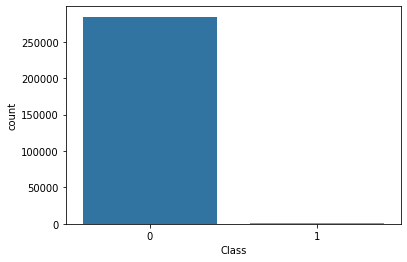

In [118]:
sns.countplot(data['Class'])
plt.show()

### Here I spotted that there is huge imbalanced data in the Class as expected

In [120]:
fraud = data[data['Class']==1]
print('There are',fraud.shape[0],'fraud cases')

There are 492 fraud cases


In [121]:
normal = data[data['Class']==0]
print('There are', normal.shape[0],'normal cases')

There are 284315 normal cases


## So lets work on how to handle the imbalanced dataset using imblearn library

In [9]:
columns =  data.columns.to_list()
columns1 = [c for c in columns if c not in ['Class']]
target = "Class"
# define random state
state = np.random.RandomState(42)
X = data[columns1]
y = data[target]
X_outliers = state.uniform(low = 0, high = 1, size = (X.shape[0], X.shape[1]))
print(X.shape)
print(y.shape)

(284807, 30)
(284807,)


### To install imblearn library use "pip install imblearn" command in jupyter. if you face user kind of error thet use  ###  "pip install imblearn  --user"

In [10]:
from imblearn.under_sampling import NearMiss

In [122]:
#Lets build the NearMiss model
nm = NearMiss()

In [12]:
X_res, y_res = nm.fit_resample(X,y)
print(X_res.shape)
print(y_res.shape)

(984, 30)
(984,)


#### Recall that fraud cases are  492 so, 492 normal case will be taken from the normal dataset and hence total 492(fraud)+492(normal)=984 samples are the new dataset will be created usng down/under sampling method

In [13]:
from collections import Counter
print('Original shape{}' .format(Counter(y)))
print('After undersampling {}'.format(Counter(y_res)))

Original shapeCounter({0: 284315, 1: 492})
After undersampling Counter({0: 492, 1: 492})


In [123]:
#Lets perform the LinearRegression on balanced under sampled data
from sklearn.linear_model import LogisticRegression

In [124]:
lr = LogisticRegression(solver = 'liblinear')

In [125]:
from sklearn.model_selection import train_test_split

In [128]:
#split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_res, y_res, test_size = 0.2)

In [127]:
#Train the LR model 
lr.fit(X_train, y_train)

LogisticRegression(solver='liblinear')

In [129]:
#Perform the tesing of the model
y_pred = lr.predict(X_test)

In [20]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, f1_score

In [130]:
print('The prediction accuracy :', accuracy_score(y_test, y_pred)*100)

The prediction accuracy : 91.87817258883248


In [22]:
cm = confusion_matrix(y_test, y_pred)

Text(33.0, 0.5, 'Actaul')

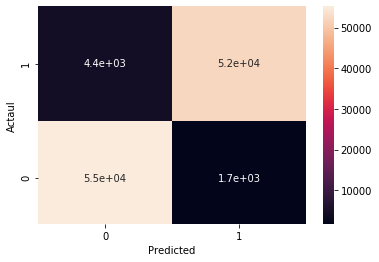

In [131]:
#Lets plot the confusion matrix
sns.heatmap(cm, annot = True)
plt.ylim(0.1, 2)
plt.xlabel('Predicted')
plt.ylabel('Actaul')

In [24]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.94      0.97      0.95       105
           1       0.97      0.92      0.94        92

    accuracy                           0.95       197
   macro avg       0.95      0.95      0.95       197
weighted avg       0.95      0.95      0.95       197



### Perfoming the under sampling will not be good bcoz there is a problem with loss of data. It can be performed if we have huge amount of data. Otherwise we can perform the oversampling.
### Which is as follows

In [132]:
from imblearn.over_sampling import RandomOverSampler

In [ ]:
### Here we are using the RandomOverSampler for the over sampling purpose

In [26]:
ro = RandomOverSampler()

In [27]:
X_ns, y_ns = ro.fit_resample(X, y)

In [28]:
print(X_ns.shape)
print(y_ns.shape)

(568630, 30)
(568630,)


In [29]:
print('Before over sampling {}'.format(Counter(y)))
print('After over sampling {}'.format(Counter(y_ns)))

Before over sampling Counter({0: 284315, 1: 492})
After over sampling Counter({0: 284315, 1: 284315})


In [30]:
X1_train, X1_test, y1_train, y1_test = train_test_split(X_ns, y_ns, test_size = 0.2)

In [31]:
lr.fit(X1_train, y1_train)

LogisticRegression(solver='liblinear')

In [32]:
y1_pred = lr.predict(X1_test)

In [33]:
y1_test[:5], y1_pred[:5]

(98093     0
 561799    1
 313471    1
 369849    1
 239399    0
 Name: Class, dtype: int64, array([0, 1, 1, 1, 0], dtype=int64))

In [34]:
accuracy_score(y1_test, y1_pred)*100

94.64942053708036

In [35]:
cm =confusion_matrix(y1_test, y1_pred)
cm

array([[55198,  1734],
       [ 4351, 52443]], dtype=int64)

In [36]:
print(classification_report(y1_test, y1_pred))

              precision    recall  f1-score   support

           0       0.93      0.97      0.95     56932
           1       0.97      0.92      0.95     56794

    accuracy                           0.95    113726
   macro avg       0.95      0.95      0.95    113726
weighted avg       0.95      0.95      0.95    113726



In [37]:
f1_score(y1_test, y1_pred)*100

94.51658541420733

# Decision TRee 

In [66]:
X

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,1.475829,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.059616,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.001396,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.127434,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00


In [68]:
d = pd.concat([X,y], axis = 1)

In [69]:
d[:]

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0


In [70]:
from sklearn.tree import DecisionTreeClassifier

In [71]:
dt = DecisionTreeClassifier()

In [73]:
dt.fit(X1_train, y1_train)

DecisionTreeClassifier()

In [74]:
dt.score(X1_train, y1_train)*100

100.0

In [77]:
yd_pred = dt.predict(X1_test)
yd_pred[:5]

array([0, 1, 1, 1, 0], dtype=int64)

In [78]:
y1_test[:5]

98093     0
561799    1
313471    1
369849    1
239399    0
Name: Class, dtype: int64

In [79]:
accuracy_score(y1_test, yd_pred)*100

99.97274150150362

In [80]:
from sklearn.model_selection import GridSearchCV,KFold

In [82]:
cv = KFold(n_splits = 5, shuffle=True,random_state=42)

In [83]:
grid = {
    'max_depth':[6,8,10,12,14,16,18],
    'criterion':['gini','entropy'],
    'max_features':["auto", "sqrt", "log2"]
}

In [102]:
gs = GridSearchCV(dt, param_grid=grid, cv=cv)

In [103]:
gs.fit(X1_train,y1_train)

GridSearchCV(cv=KFold(n_splits=5, random_state=42, shuffle=True),
             estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [6, 8, 10, 12, 14, 16, 18],
                         'max_features': ['auto', 'sqrt', 'log2']})

In [104]:
gs.best_params_

{'criterion': 'entropy', 'max_depth': 18, 'max_features': 'auto'}

In [110]:
dt1 = DecisionTreeClassifier(**gs.best_params_)

In [111]:
dt1.fit(X1_train, y1_train)

DecisionTreeClassifier(criterion='entropy', max_depth=18, max_features='auto')

In [114]:
print('Training accuracy after hyper parameter tunning:',dt1.score(X1_train, y1_train)*100)

Training accuracy after hyper parameter tunning: 99.94350456360023


In [113]:
yh_pred = dt1.predict(X1_test)

In [115]:
print('Testing accuray after hyper parameter tunning: ', dt1.score(X1_test, y1_test)*100)

Testing accuray after hyper parameter tunning:  99.9235003429295


In [116]:
print('Prediction accuracy after hyper parameter tunning: ', accuracy_score(y1_test, yh_pred)*100)

Prediction accuracy after hyper parameter tunning:  99.9235003429295


In [117]:
print('The f1_score is:', f1_score(y1_test, yh_pred)*100)

The f1_score is: 99.92346602155267


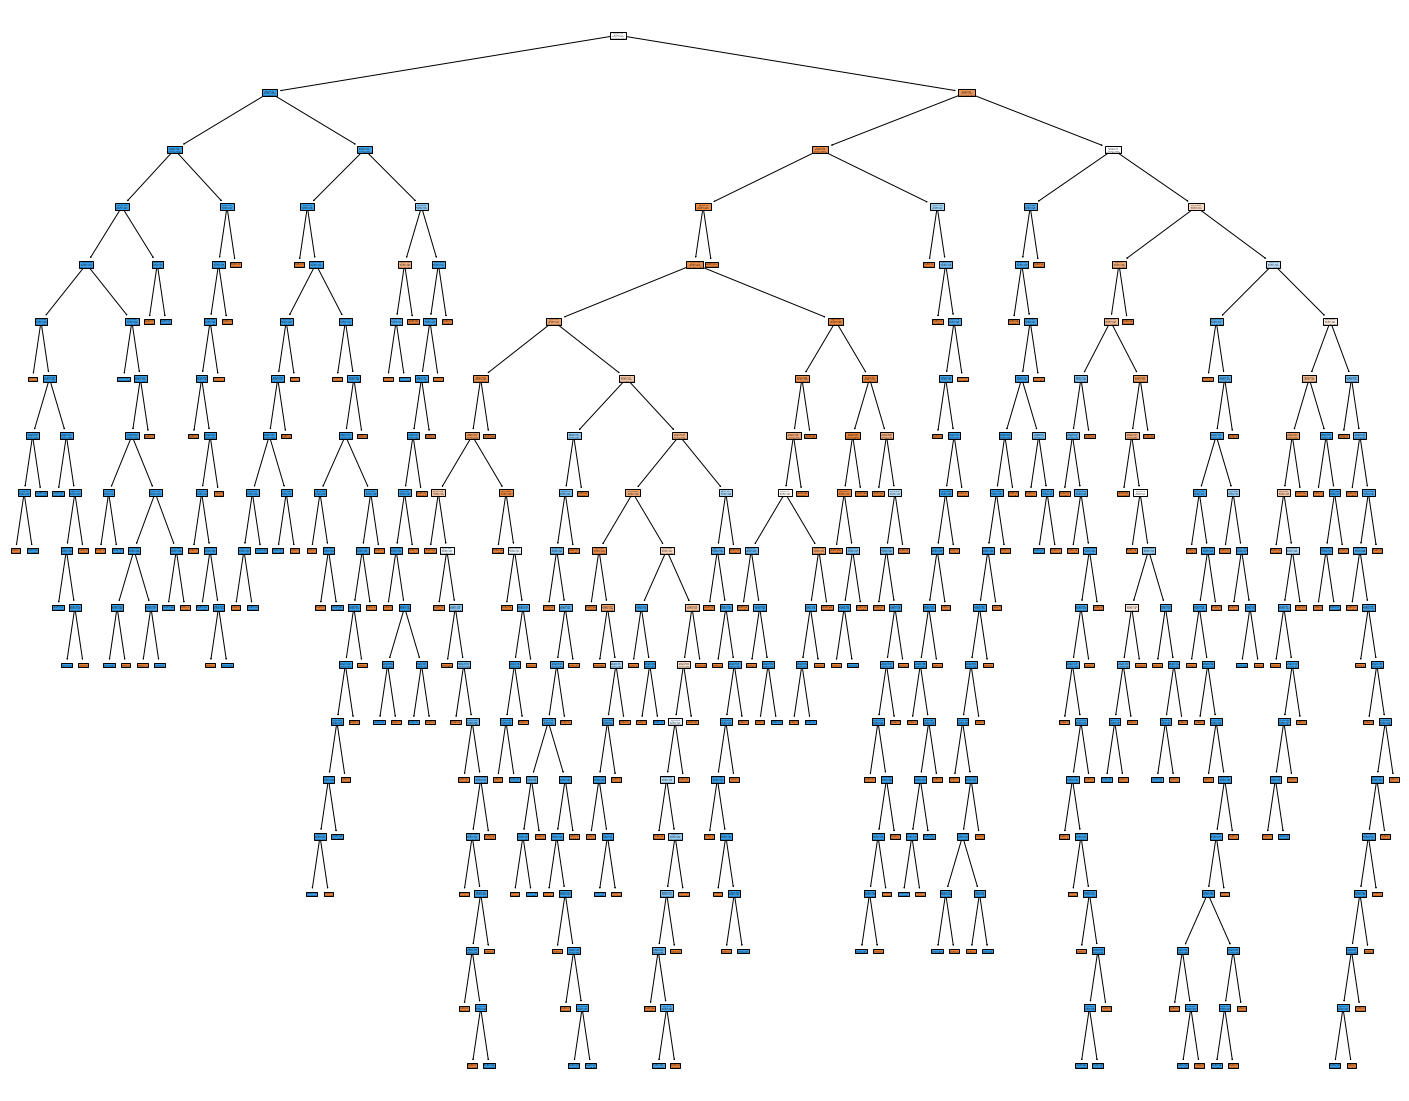

In [112]:
from sklearn import tree
plt.figure(figsize = (25,20))
tree.plot_tree(dt1, filled = True)
plt.show()